In [1]:
!pip install dython

  Using cached dython-0.7.1.post3-py3-none-any.whl (21 kB)
  Using cached scikit_plot-0.3.7-py3-none-any.whl (33 kB)


In [40]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
ccd = pd.read_csv("ccd-new.csv", encoding = 'latin')

<ipython-input-9-7a8c1c19227c>:1: DtypeWarning: Columns (68) have mixed types. Specify dtype option on import or set low_memory=False.
  ccd = pd.read_csv("ccd-new.csv", encoding = 'latin')


In [10]:
ccd

,Unnamed: 0,CaseFilingYear,CDI,CaseID,LEAIncidentNum,LEAgency,CaseStatus,Court,OffenseDT,ArrestDT,...,Disposition_2,Disposition_2_Date,Disposition_3,Disposition_3_Date,OffenseWhileOnBond,BondCaseID,BondType,BondRelDT,SourceUpdateDT,DataSetUpdateDT
0,1,2015,2,200197901010002,166405914,HPD,C,12.0,2014-12-31,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-04-26,2022-04-26
1,2,2015,2,200198301010002,166408814,HPD,I,1.0,2014-12-31,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-04-26,2022-04-26
2,3,2015,2,200198401010002,14193053,SHF,C,2.0,2014-12-31,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-04-26,2022-04-26
3,4,2015,2,200198501010002,140193045,SHF,C,3.0,2014-12-31,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-04-26,2022-04-26
4,5,2015,2,200198601010002,201462511,BPD,C,4.0,2014-12-31,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-04-26,2022-04-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383498,383499,2021,2,238458101010002,156900321,HPD,D,5.0,2021-11-22,2021-11-22,...,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,2022-04-26,2022-04-26
383499,383500,2021,2,238458201010002,156884821,HPD,A,8.0,2021-11-22,2021-11-22,...,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,2022-04-26,2022-04-26
383500,383501,2021,2,238458401010002,156977321,HPD,C,13.0,2021-11-22,2021-11-22,...,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,2022-04-26,2022-04-26
383501,383502,2021,2,238458801010002,157061421,HPD,A,2.0,2021-11-22,2021-11-22,...,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,2022-04-26,2022-04-26


In [41]:
from dython.nominal import identify_nominal_columns
from dython.nominal import associations

In [13]:
categorical_features = identify_nominal_columns(ccd)
categorical_features

['LEAIncidentNum',
 'LEAgency',
 'CaseStatus',
 'OffenseDT',
 'ArrestDT',
 'CaseFilingDT',
 'PrimaryOffenseLevelAtBooking',
 'BookingDTS',
 'ReleaseDTS',
 'ICEHolds',
 'HoldForOffenseLiteral',
 'AgencyPlacingHold',
 'HoldPlacedDT',
 'HoldLiftedDT',
 'InstrumentType',
 'DefendantName',
 'BirthMonthYear',
 'Gender',
 'Race',
 'Ethnicity',
 'defendantAddressAtCaseFiling',
 'DefendantAddress',
 'HomelessIndicator',
 'Level_Degree',
 'Offense_Literal',
 'Penal_Code',
 'UCRGroup',
 'NIBRSCode',
 'NIBRSSubCode',
 'NIBRSGrouping',
 'BondTypeCD',
 'BondTypeDSC',
 'BondFiledDate',
 'BondApprovedDT',
 'FirstWarrantIssueDT',
 'FirstWarrantReason',
 'FirstWarrantType',
 'WarrantList',
 'AttorneyStatus',
 'AttorneyStatusDesc',
 'Initial_1517_HearingFLG',
 'Initial_1517_Hearing_ActionDT',
 'PCD_SettingFLG',
 'Initial_PCD_CalendarSetDT',
 'Initial_PCD_DispositionReason',
 'Initial_PCD_DispositionReasonDSC',
 'FirstSettingDT',
 'InitialDispositionDT',
 'InitialDisposition',
 'FinalDispositionDT',
 'Fin

In [42]:
ccd['OffenseDT'] = pd.to_datetime(ccd['OffenseDT'])
ccd['Offense_Day'] = ccd['OffenseDT'].dt.day_name()

In [43]:
controls = ['Race', 'Gender', 'DefendantZip', 'Ethnicity', 'BondAmount', 'Offense_Day', 'BondTypeDSC', 'JudgementDSC', 'InitialDisposition']

In [44]:
control_ccd = ccd[controls]

In [45]:
categorical_df1 = control_ccd.copy()

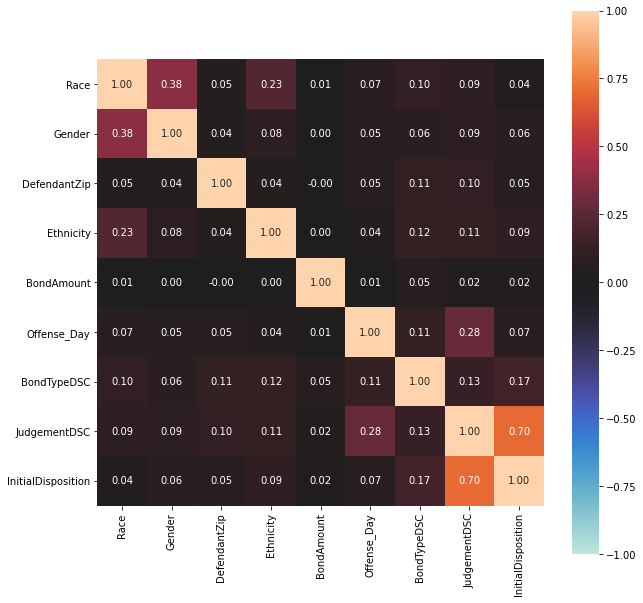

In [46]:
categorical_correlation= associations(control_ccd, filename= 'categorical_correlation.png', figsize=(10,10))

In [50]:
import seaborn as sns

In [53]:
pd.crosstab(control_ccd.JudgementDSC, control_ccd.Offense_Day, rownames = ['Judgement Decision'], colnames = ['Day of the Week'])

Day of the Week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Judgement Decision,,,,,,,
ACQUITTAL BY JURY,54,47,74,73,53,40,28
ACQUITTAL BY TRIAL TO COURT,3,2,1,2,2,3,4
CASE DISPOSED,6,4,12,17,5,2,0
CASE QUASHED,1,4,9,2,6,0,2
CONVICTION BY JURY,32,23,34,27,32,24,20
CONVICTION BY TRIAL TO COURT,9,6,7,5,3,5,6
CONVICTION-NOLO CONTENDERE,132,106,140,111,117,111,112
CONVICTION-PLEA OF GUILTY,18192,16514,19790,19060,17039,16236,16124
DEF ADJ GLT ADJUDICATED,420,430,428,405,428,450,403


In [56]:
pd.crosstab(control_ccd.JudgementDSC, control_ccd.Race, rownames = ['Judgement Decision'], colnames = ['Race of the offender']).mean()

Race of the offender
A     179.060606
B    4028.212121
I       8.878788
U     146.727273
W    5471.666667
dtype: float64